### mpstat jupyter notebook 
To run open in VSCode with a sourced venv via python3 -m venv venvmpstat
or directly from the command line with jupyter notebook and navigate to browser and execute all cells. 
Install packages with 
pip install -r requirements.txt 

I have also tested with a file called short.txt which is a smaller dataset to work with. 
Or you can also see graphs for a particular subset of cpus for example just the all categories for all cpus. 

FYI the large dataset mpstat.ab8713f3-6c19-479c-b662-bad058d8902c.out is 441M and has 2.1 million rows is slow to run.

Sampling just a few particaular cpus can be an option. Randomly selecting ~200k data points from specific cpu core say 2,4,9,200,255 
trimming the dataset is also an option. Using different visualization tools is also an option. 

Sample output mpstat.txt file 
11:21:37     CPU    %usr   %nice    %sys %iowait    %irq   %soft  %steal  %guest  %gnice   %idle
11:21:38     all    0.34    0.00    8.47    0.04    0.00    0.17    0.00   18.28    0.00   72.64
11:21:38       0    0.00    0.00   31.96    0.00    0.00    0.00    0.00    0.00    0.00   68.04
11:21:38       1    1.23    0.00    9.88    0.00    0.00    0.00    0.00    0.00    0.00   88.89
11:21:38       2    1.06    0.00    1.06    0.00    0.00    0.00    0.00    1.06    0.00   96.81

In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
# Create a list to hold the JSON data
# The following code only needs to run once
# json_data = []

# # with open('output.json', 'w') as outfile,open("../short.txt","r") as f:
# with open('output-large.json','w') as outfile,open("../mpstat.ab8713f3-6c19-479c-b662-bad058d8902c.out") as f:
#      # Split the input data into lines
#      next(f)
#      headers = []
#      for line in f:
#          if line is None or line == '\n': 
#             continue
#          else:
#             lines = line.strip().split(' ')
#             lines = list(filter(None, lines))
#             # Extract the headers
#             if len(headers) == 0:
#                headers = lines[1:]
#                continue
            
#             datetime = lines[0]               
#             row_dict = { "timestamp": datetime}
                  
#             for i in range(len(headers)):
#                k = headers[i]
#                v = lines[i+1]
#                row_dict[k] = v
#             json_data.append(row_dict)

#      json.dump(json_data, outfile)

In [4]:
# with open('output.json', 'r') as infile: 
with open('output-large.json', 'r') as infile: 
    data = json.load(infile)
    result = pd.json_normalize(data, errors='raise')
df = pd.DataFrame(result)
df.head()

,timestamp,CPU,%usr,%nice,%sys,%iowait,%irq,%soft,%steal,%guest,%gnice,%idle
0,11:21:38,all,0.34,0.00,8.47,0.04,0.00,0.17,0.00,18.28,0.00,72.64
1,11:21:38,0,0.00,0.00,31.96,0.00,0.00,0.00,0.00,0.00,0.00,68.04
2,11:21:38,1,1.23,0.00,9.88,0.00,0.00,0.00,0.00,0.00,0.00,88.89
3,11:21:38,2,1.06,0.00,1.06,0.00,0.00,0.00,0.00,1.06,0.00,96.81
4,11:21:38,3,0.00,0.00,5.10,0.00,0.00,0.00,0.00,0.00,0.00,94.90


In [5]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe

<bound method NDFrame.describe of         timestamp  CPU  %usr %nice   %sys %iowait  %irq %soft %steal  %guest  \
0        11:21:38  all  0.34  0.00   8.47    0.04  0.00  0.17   0.00   18.28   
1        11:21:38    0  0.00  0.00  31.96    0.00  0.00  0.00   0.00    0.00   
2        11:21:38    1  1.23  0.00   9.88    0.00  0.00  0.00   0.00    0.00   
3        11:21:38    2  1.06  0.00   1.06    0.00  0.00  0.00   0.00    1.06   
4        11:21:38    3  0.00  0.00   5.10    0.00  0.00  0.00   0.00    0.00   
...           ...  ...   ...   ...    ...     ...   ...   ...    ...     ...   
2157906  13:41:03  251  0.00  0.00  15.00    0.00  0.00  0.00   0.00   55.00   
2157907  13:41:03  252  0.00  0.00   0.00    0.00  0.00  0.00   0.00  100.00   
2157908  13:41:03  253  0.00  0.00   0.00    0.00  0.00  0.00   0.00    0.00   
2157909  13:41:03  254  1.00  0.00   0.00    0.00  0.00  0.00   0.00   69.00   
2157910  13:41:03  255  0.00  0.00   0.00    0.00  0.00  0.00   0.00    0.00   

     

In [6]:
df.dtypes

timestamp    object
CPU          object
%usr         object
%nice        object
%sys         object
%iowait      object
%irq         object
%soft        object
%steal       object
%guest       object
%gnice       object
%idle        object
dtype: object

In [7]:
df.rename(columns={'CPU':'cpu', '%usr':'usr','%nice':'nice','%iowait':'iowait','%irq':'irq','%soft':'soft','%steal':'steal','%guest':'guest','%sys':'sys','%gnice':'gnice','%idle':'idle'}, inplace=True)

In [8]:
df.head()

,timestamp,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
0,11:21:38,all,0.34,0.00,8.47,0.04,0.00,0.17,0.00,18.28,0.00,72.64
1,11:21:38,0,0.00,0.00,31.96,0.00,0.00,0.00,0.00,0.00,0.00,68.04
2,11:21:38,1,1.23,0.00,9.88,0.00,0.00,0.00,0.00,0.00,0.00,88.89
3,11:21:38,2,1.06,0.00,1.06,0.00,0.00,0.00,0.00,1.06,0.00,96.81
4,11:21:38,3,0.00,0.00,5.10,0.00,0.00,0.00,0.00,0.00,0.00,94.90


In [9]:
substring = ['cpu']
df = df[df['cpu'].str.contains("CPU")==False]
df.describe

<bound method NDFrame.describe of         timestamp  cpu   usr  nice    sys iowait   irq  soft steal   guest  \
0        11:21:38  all  0.34  0.00   8.47   0.04  0.00  0.17  0.00   18.28   
1        11:21:38    0  0.00  0.00  31.96   0.00  0.00  0.00  0.00    0.00   
2        11:21:38    1  1.23  0.00   9.88   0.00  0.00  0.00  0.00    0.00   
3        11:21:38    2  1.06  0.00   1.06   0.00  0.00  0.00  0.00    1.06   
4        11:21:38    3  0.00  0.00   5.10   0.00  0.00  0.00  0.00    0.00   
...           ...  ...   ...   ...    ...    ...   ...   ...   ...     ...   
2157906  13:41:03  251  0.00  0.00  15.00   0.00  0.00  0.00  0.00   55.00   
2157907  13:41:03  252  0.00  0.00   0.00   0.00  0.00  0.00  0.00  100.00   
2157908  13:41:03  253  0.00  0.00   0.00   0.00  0.00  0.00  0.00    0.00   
2157909  13:41:03  254  1.00  0.00   0.00   0.00  0.00  0.00  0.00   69.00   
2157910  13:41:03  255  0.00  0.00   0.00   0.00  0.00  0.00  0.00    0.00   

        gnice    idle  
0    

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S').dt.time

/tmp/ipykernel_15991/2610453095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S').dt.time


In [11]:
df.dtypes

timestamp    object
cpu          object
usr          object
nice         object
sys          object
iowait       object
irq          object
soft         object
steal        object
guest        object
gnice        object
idle         object
dtype: object

In [12]:
exclude_list = ['all', 'CPU','%usr','%nice','%sys','%iowait','%irq','%soft','%steal','%guest',  '%gnice','%idle']

In [13]:
df.iloc[:,1:]

,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
0,all,0.34,0.00,8.47,0.04,0.00,0.17,0.00,18.28,0.00,72.64
1,0,0.00,0.00,31.96,0.00,0.00,0.00,0.00,0.00,0.00,68.04
2,1,1.23,0.00,9.88,0.00,0.00,0.00,0.00,0.00,0.00,88.89
3,2,1.06,0.00,1.06,0.00,0.00,0.00,0.00,1.06,0.00,96.81
4,3,0.00,0.00,5.10,0.00,0.00,0.00,0.00,0.00,0.00,94.90
...,...,...,...,...,...,...,...,...,...,...,...
2157906,251,0.00,0.00,15.00,0.00,0.00,0.00,0.00,55.00,0.00,30.00
2157907,252,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00
2157908,253,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00
2157909,254,1.00,0.00,0.00,0.00,0.00,0.00,0.00,69.00,0.00,30.00


In [14]:
# df.iloc[:,1:300]
df.iloc[:1,1:-1]

,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice
0,all,0.34,0.00,8.47,0.04,0.00,0.17,0.00,18.28,0.00


In [15]:
# handle all seperately 
substring = ['all']
all_df = df[df['cpu'].str.contains("all")==True]
all_df.describe

<bound method NDFrame.describe of         timestamp  cpu   usr  nice    sys iowait   irq  soft steal  guest  \
0        11:21:38  all  0.34  0.00   8.47   0.04  0.00  0.17  0.00  18.28   
258      11:21:39  all  0.38  0.00   9.73   0.78  0.00  0.25  0.00  16.74   
516      11:21:40  all  0.43  0.00   9.29   0.21  0.00  0.15  0.00  16.51   
774      11:21:41  all  0.31  0.00  10.21   0.09  0.00  0.10  0.00  17.65   
1032     11:21:42  all  0.38  0.00   8.93   0.17  0.00  0.18  0.00  18.39   
...           ...  ...   ...   ...    ...    ...   ...   ...   ...    ...   
2156622  13:40:59  all  0.31  0.00   9.75   0.05  0.00  0.03  0.00  15.10   
2156880  13:41:00  all  0.09  0.00  10.26   0.05  0.00  0.02  0.00  14.32   
2157138  13:41:01  all  0.11  0.00   9.85   0.05  0.00  0.04  0.00  15.29   
2157396  13:41:02  all  0.16  0.00   9.19   0.23  0.00  0.06  0.00  16.41   
2157654  13:41:03  all  0.16  0.00   7.58   0.08  0.00  0.06  0.00  16.94   

        gnice   idle  
0        0.00  72.

In [16]:
df = df[df['cpu'].str.contains("all")==False]
df.head()

,timestamp,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
1,11:21:38,0,0.00,0.00,31.96,0.00,0.00,0.00,0.00,0.00,0.00,68.04
2,11:21:38,1,1.23,0.00,9.88,0.00,0.00,0.00,0.00,0.00,0.00,88.89
3,11:21:38,2,1.06,0.00,1.06,0.00,0.00,0.00,0.00,1.06,0.00,96.81
4,11:21:38,3,0.00,0.00,5.10,0.00,0.00,0.00,0.00,0.00,0.00,94.90
5,11:21:38,4,0.00,0.00,26.04,0.00,0.00,0.00,0.00,0.00,0.00,73.96


In [17]:
df.describe

<bound method NDFrame.describe of         timestamp  cpu   usr  nice    sys iowait   irq  soft steal   guest  \
1        11:21:38    0  0.00  0.00  31.96   0.00  0.00  0.00  0.00    0.00   
2        11:21:38    1  1.23  0.00   9.88   0.00  0.00  0.00  0.00    0.00   
3        11:21:38    2  1.06  0.00   1.06   0.00  0.00  0.00  0.00    1.06   
4        11:21:38    3  0.00  0.00   5.10   0.00  0.00  0.00  0.00    0.00   
5        11:21:38    4  0.00  0.00  26.04   0.00  0.00  0.00  0.00    0.00   
...           ...  ...   ...   ...    ...    ...   ...   ...   ...     ...   
2157906  13:41:03  251  0.00  0.00  15.00   0.00  0.00  0.00  0.00   55.00   
2157907  13:41:03  252  0.00  0.00   0.00   0.00  0.00  0.00  0.00  100.00   
2157908  13:41:03  253  0.00  0.00   0.00   0.00  0.00  0.00  0.00    0.00   
2157909  13:41:03  254  1.00  0.00   0.00   0.00  0.00  0.00  0.00   69.00   
2157910  13:41:03  255  0.00  0.00   0.00   0.00  0.00  0.00  0.00    0.00   

        gnice    idle  
1    

In [18]:
df[df.columns[1:]] = df[df.columns[1:]].astype(float)
df.head()

/tmp/ipykernel_15991/3991690103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns[1:]] = df[df.columns[1:]].astype(float)


,timestamp,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
1,11:21:38,0.00,0.00,0.00,31.96,0.00,0.00,0.00,0.00,0.00,0.00,68.04
2,11:21:38,1.00,1.23,0.00,9.88,0.00,0.00,0.00,0.00,0.00,0.00,88.89
3,11:21:38,2.00,1.06,0.00,1.06,0.00,0.00,0.00,0.00,1.06,0.00,96.81
4,11:21:38,3.00,0.00,0.00,5.10,0.00,0.00,0.00,0.00,0.00,0.00,94.90
5,11:21:38,4.00,0.00,0.00,26.04,0.00,0.00,0.00,0.00,0.00,0.00,73.96


In [19]:
df.dtypes

timestamp     object
cpu          float64
usr          float64
nice         float64
sys          float64
iowait       float64
irq          float64
soft         float64
steal        float64
guest        float64
gnice        float64
idle         float64
dtype: object

In [20]:
df.describe()

,cpu,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
count,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00
mean,127.50,0.40,0.00,8.19,0.16,0.00,0.08,0.00,15.19,0.00,75.99
std,73.90,2.47,0.00,18.01,1.37,0.00,0.78,0.00,29.37,0.00,33.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,63.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.27
50%,127.50,0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,95.00
75%,191.25,0.00,0.00,5.10,0.00,0.00,0.00,0.00,12.24,0.00,99.00
max,255.00,100.00,0.00,100.00,100.00,0.00,87.00,0.00,100.00,0.00,100.00


In [21]:
# drop columns that have 0 average 
s = df.describe() 
count = s[:1]
print(count)
s = s.iloc[1:,1:]
s

             cpu        usr       nice        sys     iowait        irq  \
count 2141184.00 2141184.00 2141184.00 2141184.00 2141184.00 2141184.00   

            soft      steal      guest      gnice       idle  
count 2141184.00 2141184.00 2141184.00 2141184.00 2141184.00  


,usr,nice,sys,iowait,irq,soft,steal,guest,gnice,idle
mean,0.40,0.00,8.19,0.16,0.00,0.08,0.00,15.19,0.00,75.99
std,2.47,0.00,18.01,1.37,0.00,0.78,0.00,29.37,0.00,33.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.27
50%,0.00,0.00,1.01,0.00,0.00,0.00,0.00,0.00,0.00,95.00
75%,0.00,0.00,5.10,0.00,0.00,0.00,0.00,12.24,0.00,99.00
max,100.00,0.00,100.00,100.00,0.00,87.00,0.00,100.00,0.00,100.00


In [22]:
s = s.drop(labels=['nice','irq','steal','gnice'], axis=1)
s

,usr,sys,iowait,soft,guest,idle
mean,0.40,8.19,0.16,0.08,15.19,75.99
std,2.47,18.01,1.37,0.78,29.37,33.64
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,63.27
50%,0.00,1.01,0.00,0.00,0.00,95.00
75%,0.00,5.10,0.00,0.00,12.24,99.00
max,100.00,100.00,100.00,87.00,100.00,100.00


<Axes: >

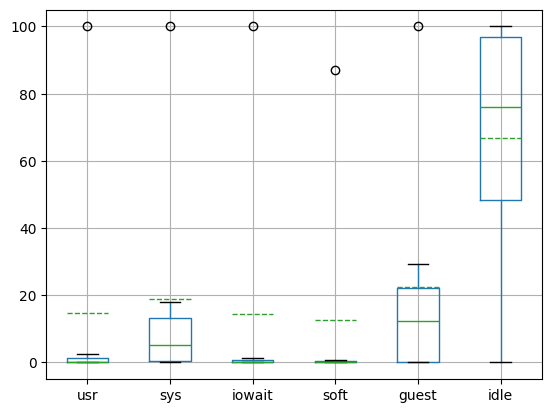

In [23]:
s.boxplot(meanline=True, showmeans=True)

In [24]:
px.box(s)

In [25]:
df = df.drop(labels=['nice','irq','steal','gnice'], axis=1)
df.head()

,timestamp,cpu,usr,sys,iowait,soft,guest,idle
1,11:21:38,0.00,0.00,31.96,0.00,0.00,0.00,68.04
2,11:21:38,1.00,1.23,9.88,0.00,0.00,0.00,88.89
3,11:21:38,2.00,1.06,1.06,0.00,0.00,1.06,96.81
4,11:21:38,3.00,0.00,5.10,0.00,0.00,0.00,94.90
5,11:21:38,4.00,0.00,26.04,0.00,0.00,0.00,73.96


In [26]:
df.describe()

,cpu,usr,sys,iowait,soft,guest,idle
count,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00,2141184.00
mean,127.50,0.40,8.19,0.16,0.08,15.19,75.99
std,73.90,2.47,18.01,1.37,0.78,29.37,33.64
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,63.75,0.00,0.00,0.00,0.00,0.00,63.27
50%,127.50,0.00,1.01,0.00,0.00,0.00,95.00
75%,191.25,0.00,5.10,0.00,0.00,12.24,99.00
max,255.00,100.00,100.00,100.00,87.00,100.00,100.00


In [27]:
### Use smaller random sample 
df_sample = df.sample(n=8000, replace=False, random_state=1)
df_sample.head()

,timestamp,cpu,usr,sys,iowait,soft,guest,idle
695164,12:06:33,111.00,0.00,0.00,0.00,0.00,26.60,73.40
1441888,12:54:47,183.00,0.00,46.00,0.00,0.00,0.00,54.00
566068,11:58:13,15.00,1.01,0.00,0.00,0.00,0.00,98.99
1503763,12:58:48,138.00,1.02,13.27,0.00,0.00,0.00,85.71
856583,12:16:59,22.00,0.00,0.00,0.00,0.00,45.00,55.00


In [29]:
df_sample = df_sample.sort_values(by='timestamp')

In [30]:
df_sample.describe

<bound method NDFrame.describe of         timestamp    cpu  usr  sys  iowait  soft  guest   idle
14       11:21:38  13.00 0.00 2.02    0.00  0.00   0.00  97.98
85       11:21:38  84.00 0.00 1.02    0.00  0.00  90.82   8.16
57       11:21:38  56.00 0.00 0.00    0.00  0.00   0.00 100.00
327      11:21:39  68.00 0.00 0.00    0.00  0.00   0.00 100.00
1156     11:21:42 123.00 0.00 0.00    0.00  1.00  99.00   0.00
...           ...    ...  ...  ...     ...   ...    ...    ...
2157099  13:41:00 218.00 0.00 0.00    0.00  0.00 100.00   0.00
2157579  13:41:02 182.00 0.00 2.00    1.00  0.00   5.00  92.00
2157452  13:41:02  55.00 0.00 0.00    1.02  0.00   0.00  98.98
2157400  13:41:02   3.00 0.00 0.00    0.00  0.00   0.00 100.00
2157782  13:41:03 127.00 0.00 0.00    0.00  0.00   0.00 100.00

[8000 rows x 8 columns]>

In [31]:
df_sample = df_sample.groupby(['cpu']).apply(lambda x: x)
df_sample.head()

/tmp/ipykernel_15991/3321084546.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



timestamp  cpu  usr  sys  iowait  soft  guest  idle
cpu                                                            
0.00 90817   11:27:31 0.00 0.00 4.71    0.00  0.00   5.88 89.41
     91591   11:27:34 0.00 1.43 4.29    0.00  0.00   1.43 92.86
     246391  11:37:34 0.00 1.49 1.49    0.00  0.00   0.00 97.01
     255163  11:38:08 0.00 1.23 1.23    0.00  0.00   0.00 97.53
     274513  11:39:23 0.00 1.43 0.00    0.00  0.00   0.00 98.57

In [33]:
df_sample = df_sample.sort_values(by='timestamp')
for col in df_sample.columns[2:]:
    fig = px.scatter(data_frame=df_sample, x='timestamp', y=col, color='cpu', title=col +' over time')
    fig.show()